In [25]:
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn import decomposition, ensemble

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import RFE, RFECV
from sklearn import feature_selection

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, make_scorer

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

import Feature_Extraction as fe

In [2]:
# load the dataset_RTE

root = ET.parse('data/RTE1_dev1_3ways.xml').getroot()
r1 = []
r2 = []
y = []
for el in list(root):
    label = el.get('entailment')
    if label == 'YES':
        y.append(1)
    elif label == 'NO':
        y.append(1)
    else:
        y.append(-1)
    r1.append(list(el)[0].text)
    r2.append(list(el)[1].text)
    
root = ET.parse('data/RTE1_dev2_3ways.xml').getroot()
for el in list(root):
    label = el.get('entailment')
    if label == 'YES':
        y.append(1)
    elif label == 'NO':
        y.append(1)
    else:
        y.append(-1)
    r1.append(list(el)[0].text)
    r2.append(list(el)[1].text)
    
r1t = []
r2t = []
yt = []
root = ET.parse('data/RTE1_test_3ways.xml').getroot()
for el in list(root):
    label = el.get('entailment')
    if label == 'YES':
        yt.append(1)
    elif label == 'NO':
        yt.append(1)
    else:
        y.append(-1)
    r1t.append(list(el)[0].text)
    r2t.append(list(el)[1].text)
    
r1 = r1 + r1t
r2 = r2 + r2t
y = y + yt

In [3]:
# load the dataset AquaLush

data = open('data/five_hundred_rels.CSV', encoding="ANSI").read()
label, r_aq1, r_aq2, rmix_aq = [], [], [], []
for i, line in enumerate(data.split("\n")):
    if line != '' and line.isspace() != True:
        content = line.split(';')
        label.append(content[0])
        r_aq1.append(content[1])
        r_aq2.append(content[2])
        rmix_aq.append(content[1]+content[2])

y_aq = []
for l in label:
    if l == 'true':
        y_aq.append(1)
    else:
        y_aq.append(-1)

In [10]:
x_all_old = []
x_sixteen = []
x_ten = []

for index in range(len(r1)):
    x_all_old.append(fe.createFBag(r1[index], r2[index]))
    x_sixteen.append(fe.getMatureFeatures16_Pair_Raw(r1[index], r2[index]))
    x_ten.append(fe.getMatureFeatures10_Pair_Raw(r1[index], r2[index]))
    index = index + 1

In [11]:
x_all_old_aq = []
x_sixteen_aq = []
x_ten_aq = []

for index in range(len(r_aq1)):
    x_all_old_aq.append(fe.createFBag(r_aq1[index], r_aq2[index]))
    x_sixteen_aq.append(fe.getMatureFeatures16_Pair_Raw(r_aq1[index], r_aq2[index]))
    x_ten_aq.append(fe.getMatureFeatures10_Pair_Raw(r_aq1[index], r_aq2[index]))
    index = index + 1


In [12]:
vec = DictVectorizer()
xx_all_old = vec.fit_transform(x_all_old).toarray()
xx_sixteen = vec.fit_transform(x_sixteen).toarray()
xx_ten = vec.fit_transform(x_ten).toarray()

In [13]:
vec = DictVectorizer()
xx_all_old_aq = vec.fit_transform(x_all_old_aq).toarray()
xx_sixteen_aq = vec.fit_transform(x_sixteen_aq).toarray()
xx_ten_aq = vec.fit_transform(x_ten_aq).toarray()

In [21]:
print('Shape of Feature Sets:')
print()
print('All various types of features in a feature bag - - - - -')
print('Non-vectorized Example:   ', x_all_old[0])
print()
print('Vectorized shape:   ', xx_all_old.shape)
print()
print()
print()

print('Two subjects, two objects, one root verb and one describing word associated with them (16 features for each pair) - - - - -')
print('Non-vectorized Example:   ', x_sixteen[0])
print()
print('Vectorized shape:   ', xx_sixteen.shape)
print()
print()
print()

print('Two subjects, two objects, one root verb (10 features for each pair) - - - - -')
print('Non-vectorized Example:   ', x_ten[0])
print()
print('Vectorized shape:   ', xx_ten.shape)
print()
print()
print()


Shape of Feature Sets:

All various types of features in a feature bag - - - - -
Non-vectorized Example:    {'subjsubj': 0.5, 'subjobj': 0.5, 'objsubj': 0.5, 'objobj': 1, 'asubjsubj': 0, 'asubjobj': 0, 'aobjsubj': 0, 'aobjobj': 0, 'noun_ovlap_1_2': 0.5, 'noun_ovlap_2_1': 0.5, 'verb_ovlap_1_2': 0, 'verb_ovlap_2_1': 0, 'M_1': 'unknown', 'root_1': 'trade', 'M_2': 'unknown', 'root_2': 'rise'}

Vectorized shape:    (1367, 845)



Two subjects, two objects, one root verb and one describing word associated with them (16 features for each pair) - - - - -
Non-vectorized Example:    {'subj11': 'oil', 'subj12': 'NONE', 'obj11': 'delivery', 'obj12': '37.80', 'root1': 'trade', 'subj_des1': 'crude', 'obj_des1': 'april', 'root_des1': 'down', 'subj21': 'price', 'subj22': 'NONE', 'obj21': '37.80', 'obj22': 'barrel', 'root2': 'rise', 'subj_des2': 'oil', 'obj_des2': '$', 'root_des2': 'NONE'}

Vectorized shape:    (1367, 8581)



Two subjects, two objects, one root verb (10 features for each pair) - - - -

In [40]:
import warnings
warnings.filterwarnings('ignore')

all_old_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
sixteen_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
ten_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}

all_old_scores_aq = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
sixteen_scores_aq = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
ten_scores_aq = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}

num_of_trials = 10
kfold = 10
myscores = ['precision', 'recall', 'f1']

for i in range(num_of_trials):
    clf = LogisticRegression(C=4.281332398719396, class_weight='balanced', penalty= 'l1', solver= 'liblinear')
    skf = StratifiedShuffleSplit(n_splits=kfold)
    
    nested_score_all_old = cross_validate(clf, X=xx_all_old, y=y, cv=skf, scoring=myscores)
    nested_score_sixteen = cross_validate(clf, X=xx_sixteen, y=y, cv=skf, scoring=myscores)
    nested_score_ten = cross_validate(clf, X=xx_ten, y=y, cv=skf, scoring=myscores)
    
    nested_score_all_old_aq = cross_validate(clf, X=xx_all_old_aq, y=y_aq, cv=skf, scoring=myscores)
    nested_score_sixteen_aq = cross_validate(clf, X=xx_sixteen_aq, y=y_aq, cv=skf, scoring=myscores)
    nested_score_ten_aq = cross_validate(clf, X=xx_ten_aq, y=y_aq, cv=skf, scoring=myscores)
    
    for scr in myscores:
        all_old_scores[scr] = np.concatenate((all_old_scores[scr], nested_score_all_old['test_' + scr]), axis=None)
        sixteen_scores[scr] = np.concatenate((sixteen_scores[scr], nested_score_sixteen['test_' + scr]), axis=None)
        ten_scores[scr] = np.concatenate((ten_scores[scr], nested_score_ten['test_' + scr]), axis=None)
        
        all_old_scores_aq[scr] = np.concatenate((all_old_scores_aq[scr], nested_score_all_old_aq['test_' + scr]), axis=None)
        sixteen_scores_aq[scr] = np.concatenate((sixteen_scores_aq[scr], nested_score_sixteen_aq['test_' + scr]), axis=None)
        ten_scores_aq[scr] = np.concatenate((ten_scores_aq[scr], nested_score_ten_aq['test_' + scr]), axis=None)
        


In [41]:
df = pd.DataFrame({'all_precision':all_old_scores['precision'], 'all_recall':all_old_scores['recall'], 'all_f1':all_old_scores['f1'],
                  'sixteen_precision':sixteen_scores['precision'], 'sixteen_recall':sixteen_scores['recall'], 'sixteen_f1':sixteen_scores['f1'],
                   'ten_precision':ten_scores['precision'], 'ten_recall':ten_scores['recall'], 'ten_f1':ten_scores['f1']})

df_aq = pd.DataFrame({'all_precision':all_old_scores_aq['precision'], 'all_recall':all_old_scores_aq['recall'], 'all_f1':all_old_scores_aq['f1'],
                  'sixteen_precision':sixteen_scores_aq['precision'], 'sixteen_recall':sixteen_scores_aq['recall'], 'sixteen_f1':sixteen_scores_aq['f1'],
                   'ten_precision':ten_scores_aq['precision'], 'ten_recall':ten_scores_aq['recall'], 'ten_f1':ten_scores_aq['f1']})

Feature Set Evaluation on RTE DATASET


(0, 1)

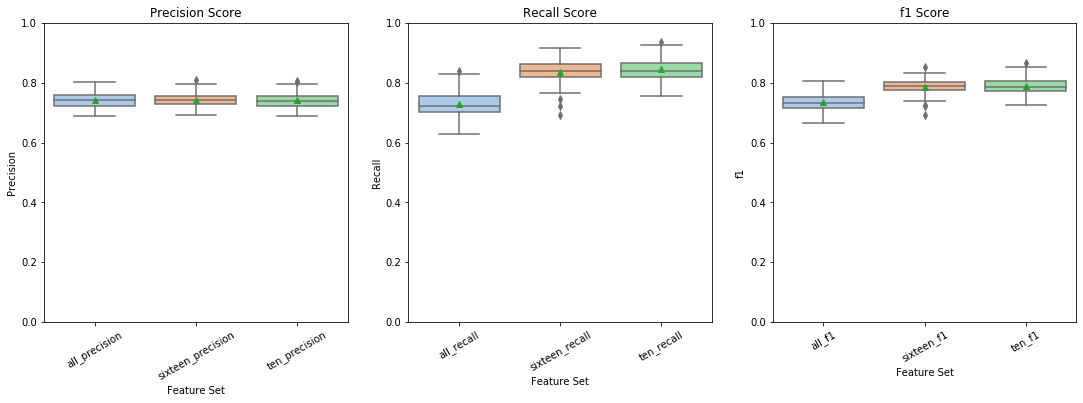

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 5.5)
print("Feature Set Evaluation on RTE DATASET")
#print()
#print()
#print()

#print("------------------------")
#print()
precision_data = pd.melt(df[['all_precision', 'sixteen_precision', 'ten_precision']])
axp = sns.boxplot(x="variable", y="value", data=precision_data, showmeans=True, palette="pastel", ax=ax1)
#axp = sns.swarmplot(x="variable", y="value", data=precision_data, size=10, orient="v", color='.2', alpha=0.5, ax=ax1)
axp.set(xlabel='Feature Set', ylabel='Precision')
axp.set_xticklabels(axp.get_xticklabels(),rotation=30)
axp.set_title('Precision Score')
axp.set_ylim(0,1)
#print(stats.describe(df['all_precision']))
#print(stats.describe(df['sixteen_precision']))
#print(stats.describe(df['ten_precision']))
#print("------------------------")
#print()
recall_data = pd.melt(df[['all_recall', 'sixteen_recall', 'ten_recall']])
axr = sns.boxplot(x="variable", y="value", data=recall_data, showmeans=True, palette="pastel", ax=ax2)
#axr = sns.swarmplot(x="variable", y="value", data=recall_data, size=10, orient="v", color='.2', alpha=0.5, ax=ax2)
axr.set(xlabel='Feature Set', ylabel='Recall')
axr.set_xticklabels(axr.get_xticklabels(),rotation=30)
axr.set_title('Recall Score')
axr.set_ylim(0,1)
#print(stats.describe(df['all_recall']))
#print(stats.describe(df['sixteen_recall']))
#print(stats.describe(df['ten_recall']))
#print("------------------------")
#print()
f1_data = pd.melt(df[['all_f1', 'sixteen_f1', 'ten_f1']])
axf = sns.boxplot(x="variable", y="value", data=f1_data, showmeans=True, palette="pastel", ax=ax3)
#axf = sns.swarmplot(x="variable", y="value", data=f1_data, size=10, orient="v", color='.2', alpha=0.5, ax=ax3)
axf.set(xlabel='Feature Set', ylabel='f1')
axf.set_xticklabels(axf.get_xticklabels(),rotation=30)
axf.set_title('f1 Score')
axf.set_ylim(0,1)
#print(stats.describe(df['all_f1']))
#print(stats.describe(df['sixteen_f1']))
#print(stats.describe(df['ten_f1']))

Feature Set Evaluation on AquaLush DATASET


(0, 1)

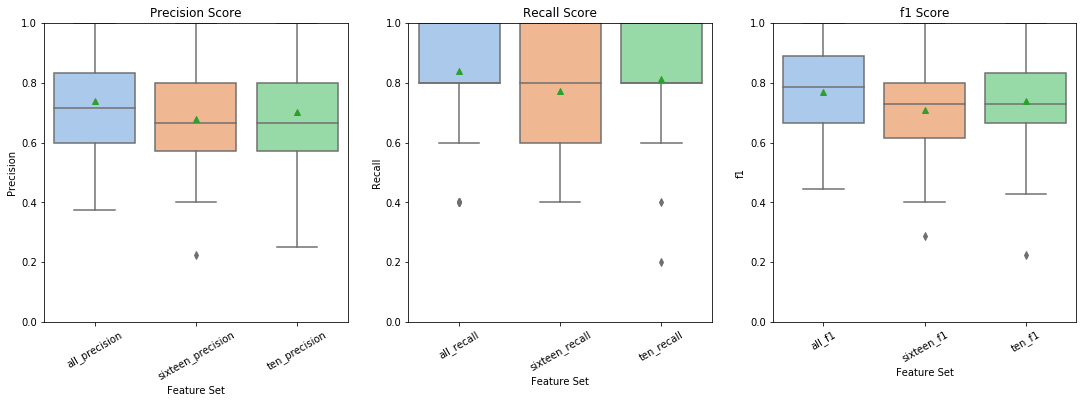

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 5.5)
print("Feature Set Evaluation on AquaLush DATASET")
#print()
#print()
#print()

#print("------------------------")
#print()
precision_data = pd.melt(df_aq[['all_precision', 'sixteen_precision', 'ten_precision']])
axp = sns.boxplot(x="variable", y="value", data=precision_data, showmeans=True, palette="pastel", ax=ax1)
#axp = sns.swarmplot(x="variable", y="value", data=precision_data, size=10, orient="v", color='.2', alpha=0.5, ax=ax1)
axp.set(xlabel='Feature Set', ylabel='Precision')
axp.set_xticklabels(axp.get_xticklabels(),rotation=30)
axp.set_title('Precision Score')
axp.set_ylim(0,1)
#print(stats.describe(df['all_precision']))
#print(stats.describe(df['sixteen_precision']))
#print(stats.describe(df['ten_precision']))
#print("------------------------")
#print()
recall_data = pd.melt(df_aq[['all_recall', 'sixteen_recall', 'ten_recall']])
axr = sns.boxplot(x="variable", y="value", data=recall_data, showmeans=True, palette="pastel", ax=ax2)
#axr = sns.swarmplot(x="variable", y="value", data=recall_data, size=10, orient="v", color='.2', alpha=0.5, ax=ax2)
axr.set(xlabel='Feature Set', ylabel='Recall')
axr.set_xticklabels(axr.get_xticklabels(),rotation=30)
axr.set_title('Recall Score')
axr.set_ylim(0,1)
#print(stats.describe(df['all_recall']))
#print(stats.describe(df['sixteen_recall']))
#print(stats.describe(df['ten_recall']))
#print("------------------------")
#print()
f1_data = pd.melt(df_aq[['all_f1', 'sixteen_f1', 'ten_f1']])
axf = sns.boxplot(x="variable", y="value", data=f1_data, showmeans=True, palette="pastel", ax=ax3)
#axf = sns.swarmplot(x="variable", y="value", data=f1_data, size=10, orient="v", color='.2', alpha=0.5, ax=ax3)
axf.set(xlabel='Feature Set', ylabel='f1')
axf.set_xticklabels(axf.get_xticklabels(),rotation=30)
axf.set_title('f1 Score')
axf.set_ylim(0,1)
#print(stats.describe(df['all_f1']))
#print(stats.describe(df['sixteen_f1']))
#print(stats.describe(df['ten_f1']))

In [76]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

final_scores = {'precision': {}, 'recall' : {}, 'f1' : {},
            'tp' : {}, 'fp' : {}, 'tn' : {}, 'fn' : {}}

kfold = 10
rskf = RepeatedStratifiedKFold(n_splits=kfold, n_repeats=5, random_state=11)

LR_clf =  LogisticRegression(C=4.281332398719396, class_weight='balanced', penalty= 'l1', solver= 'liblinear')
NB_clf = ComplementNB()
ET_clf = ExtraTreesClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10)
clfs = [LR_clf, NB_clf, ET_clf]

for clf in clfs:
    scoring =  {'precision':'precision', 'recall':'recall', 'f1':'f1', 'tp': make_scorer(tp), 'tn': make_scorer(tn), 'fp': make_scorer(fp), 'fn': make_scorer(fn)}
    res = cross_validate(clf, X=xx_ten, y=y, cv=rskf, scoring=scoring, n_jobs=-1)
    for scr in scoring.keys():
                final_scores[scr][type(clf).__name__] = res['test_' + scr].tolist()

In [80]:
precision_df = pd.DataFrame(final_scores['precision'])
recall_df = pd.DataFrame(final_scores['recall'])
f1_df = pd.DataFrame(final_scores['f1'])

f_df = pd.DataFrame(columns=['LogisticRegression', 'MultinomialNB', 'ExtraTrees'],
                  index=['Precision', 'PrecisionVariance', 'Recall', 'RecallVariance', 'f1', 'f1Variance'])
f_df['LogisticRegression'] = [np.mean(precision_df['LogisticRegression']), np.var(precision_df['LogisticRegression']),
                            np.mean(recall_df['LogisticRegression']), np.var(recall_df['LogisticRegression']),
                            np.mean(f1_df['LogisticRegression']), np.var(f1_df['LogisticRegression'])]

f_df['MultinomialNB'] = [np.mean(precision_df['ComplementNB']), np.var(precision_df['ComplementNB']),
                            np.mean(recall_df['ComplementNB']), np.var(recall_df['ComplementNB']),
                            np.mean(f1_df['ComplementNB']), np.var(f1_df['ComplementNB'])]

f_df['ExtraTrees'] = [np.mean(precision_df['ExtraTreesClassifier']), np.var(precision_df['ExtraTreesClassifier']),
                            np.mean(recall_df['ExtraTreesClassifier']), np.var(recall_df['ExtraTreesClassifier']),
                            np.mean(f1_df['ExtraTreesClassifier']), np.var(f1_df['ExtraTreesClassifier'])]

f_df

,LogisticRegression,MultinomialNB,ExtraTrees
Precision,0.738765,0.768691,0.722645
PrecisionVariance,0.000375,0.001406,0.000270
Recall,0.849247,0.616987,0.923326
RecallVariance,0.001427,0.002628,0.000946
f1,0.789791,0.683420,0.810502
f1Variance,0.000503,0.001520,0.000305


In [81]:
y_cosine = []
for index in range(len(r1)):
    doc1 = fe.nlp(r1[index])
    doc2 = fe.nlp(r2[index])
    sim = doc1.similarity(doc2)
    if sim > 0.7:
        y_cosine.append(1)
    else:
        y_cosine.append(-1)
    index = index + 1
print(classification_report(y, y_cosine))

              precision    recall  f1-score   support

          -1       0.31      0.24      0.27       433
           1       0.68      0.75      0.71       934

    accuracy                           0.59      1367
   macro avg       0.50      0.50      0.49      1367
weighted avg       0.56      0.59      0.57      1367



In [95]:
false_precision = []
false_recall = []
for i in range(len(final_scores['tp']['LogisticRegression'])):
    the_tp = final_scores['tp']['LogisticRegression'][i]
    the_fp = final_scores['fp']['LogisticRegression'][i]
    the_tn = final_scores['tn']['LogisticRegression'][i]
    the_fn = final_scores['fn']['LogisticRegression'][i]
    false_precision.append(the_tn/(the_tn+the_fn))
    false_recall.append(the_tn/(the_tn+the_fp))

print('LogisticRegression:')
print(np.mean(false_precision))
print(np.mean(false_recall))
print()
print()

false_precision = []
false_recall = []
for i in range(len(final_scores['tp']['ExtraTreesClassifier'])):
    the_tp = final_scores['tp']['ExtraTreesClassifier'][i]
    the_fp = final_scores['fp']['ExtraTreesClassifier'][i]
    the_tn = final_scores['tn']['ExtraTreesClassifier'][i]
    the_fn = final_scores['fn']['ExtraTreesClassifier'][i]
    false_precision.append(the_tn/(the_tn+the_fn))
    false_recall.append(the_tn/(the_tn+the_fp))

print('ExtraTreesClassifier:')
print(np.mean(false_precision))
print(np.mean(false_recall))

LogisticRegression:
0.5240689677534034
0.35150105708245244


ExtraTreesClassifier:
0.5964735874720395
0.23469344608879494


In [96]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

final_scores_aq = {'precision': {}, 'recall' : {}, 'f1' : {},
            'tp' : {}, 'fp' : {}, 'tn' : {}, 'fn' : {}}

kfold = 10
rskf = RepeatedStratifiedKFold(n_splits=kfold, n_repeats=5, random_state=11)

LR_clf =  LogisticRegression(C=4.281332398719396, class_weight='balanced', penalty= 'l1', solver= 'liblinear')
NB_clf = ComplementNB()
ET_clf = ExtraTreesClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10)
clfs = [LR_clf, NB_clf, ET_clf]

for clf in clfs:
    scoring =  {'precision':'precision', 'recall':'recall', 'f1':'f1', 'tp': make_scorer(tp), 'tn': make_scorer(tn), 'fp': make_scorer(fp), 'fn': make_scorer(fn)}
    res = cross_validate(clf, X=xx_ten_aq, y=y_aq, cv=rskf, scoring=scoring, n_jobs=-1)
    for scr in scoring.keys():
                final_scores_aq[scr][type(clf).__name__] = res['test_' + scr].tolist()

In [97]:
precision_df = pd.DataFrame(final_scores_aq['precision'])
recall_df = pd.DataFrame(final_scores_aq['recall'])
f1_df = pd.DataFrame(final_scores_aq['f1'])

f_df = pd.DataFrame(columns=['LogisticRegression', 'MultinomialNB', 'ExtraTrees'],
                  index=['Precision', 'PrecisionVariance', 'Recall', 'RecallVariance', 'f1', 'f1Variance'])
f_df['LogisticRegression'] = [np.mean(precision_df['LogisticRegression']), np.var(precision_df['LogisticRegression']),
                            np.mean(recall_df['LogisticRegression']), np.var(recall_df['LogisticRegression']),
                            np.mean(f1_df['LogisticRegression']), np.var(f1_df['LogisticRegression'])]

f_df['MultinomialNB'] = [np.mean(precision_df['ComplementNB']), np.var(precision_df['ComplementNB']),
                            np.mean(recall_df['ComplementNB']), np.var(recall_df['ComplementNB']),
                            np.mean(f1_df['ComplementNB']), np.var(f1_df['ComplementNB'])]

f_df['ExtraTrees'] = [np.mean(precision_df['ExtraTreesClassifier']), np.var(precision_df['ExtraTreesClassifier']),
                            np.mean(recall_df['ExtraTreesClassifier']), np.var(recall_df['ExtraTreesClassifier']),
                            np.mean(f1_df['ExtraTreesClassifier']), np.var(f1_df['ExtraTreesClassifier'])]

f_df

,LogisticRegression,MultinomialNB,ExtraTrees
Precision,0.677000,0.583401,0.895000
PrecisionVariance,0.025367,0.021237,0.020592
Recall,0.807333,0.876667,0.572667
RecallVariance,0.029168,0.018944,0.039053
f1,0.723096,0.691730,0.674219
f1Variance,0.017127,0.015839,0.029133


In [99]:
y_cosine = []
for index in range(len(r_aq1)):
    doc1 = fe.nlp(r_aq1[index])
    doc2 = fe.nlp(r_aq2[index])
    sim = doc1.similarity(doc2)
    if sim > 0.5:
        y_cosine.append(1)
    else:
        y_cosine.append(-1)
    index = index + 1
print(classification_report(y_aq, y_cosine))

              precision    recall  f1-score   support

          -1       0.96      0.06      0.11       449
           1       0.11      0.98      0.19        51

    accuracy                           0.15       500
   macro avg       0.54      0.52      0.15       500
weighted avg       0.88      0.15      0.12       500

